In [1]:
import scipy
import scipy.stats
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import pickle
import pandas as pd
%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Minimum number 1: x=0.090, y=-0.713, f(x, y)=-1.032
Minimum number 2: x=-0.090, y=0.713, f(x, y)=-1.032

With initial guess (x, y)=(0, 0) (saddle point) the minimum is: x=0.000, y=0.000, f(x, y)=0.000
It's clear that the algorithm depends strongly on the initial guess


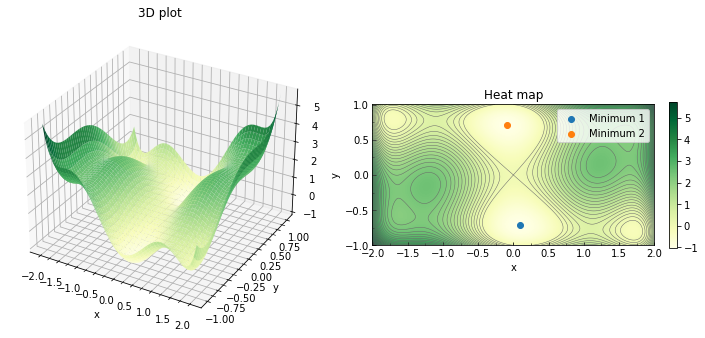

In [2]:
from pylab import meshgrid

# definition of function f
def f(variables):
    x, y = variables
    return (4-2.1*pow(x,2)+pow(x,4)/3)*pow(x,2)+x*y+(4*pow(y,2)-4)*pow(y,2)

# creation of x,y grid
x = np.linspace(-2, 2, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = meshgrid(x, y)
Z = f((X, Y))
fmin, fmax = np.abs(Z).min(), np.abs(Z).max()

# 3D plot of the function
fig = plt.figure(figsize=(12,6))
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
ax0.plot_surface(X, Y, Z, cmap='YlGn')
ax0.set_title('3D plot')
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.xaxis.set_minor_locator(AutoMinorLocator(2))
ax0.yaxis.set_minor_locator(AutoMinorLocator(2))
ax0.tick_params(which='both', direction='in')
ax0.grid(which='major', axis='both', alpha=0.25)
ax0.set_axisbelow(True)

# heat map of the function
ax1 = fig.add_subplot(1, 2, 2)
c = ax1.pcolormesh(X, Y, Z, cmap='YlGn', shading='auto')
ax1.contour(X, Y, Z, np.linspace(fmin,fmax,40),linewidths=0.5, colors='dimgrey')
ax1.set_aspect('equal', adjustable='box')
fig.colorbar(c, ax=ax1, fraction=0.024)
ax1.set_title('Heat map')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.tick_params(which='both', direction='in')

# set of the initial guesses
x0 = [[0, -0.75], [0, 0.75]]

# search the minima for the two guesses and plot on the heat map
for i, j in enumerate(x0):
    solution = scipy.optimize.minimize(f, j)
    x, y = solution.x
    print("Minimum number %d: x=%1.3f, y=%1.3f, f(x, y)=%1.3f"%(i+1, x, y, f((x,y))))
    ax1.scatter(x, y, marker="o", label='Minimum {}'.format(i+1))

# what happens with initial guess (x,y)=(0,0)?
x0_ = [0, 0]
solution_ = scipy.optimize.minimize(f, x0_)
x_, y_ = solution_.x
print("\nWith initial guess (x, y)=(0, 0) (saddle point) the minimum is: x=%1.3f, y=%1.3f, f(x, y)=%1.3f"%(x_, y_, f((x_,y_))))
print("It's clear that the algorithm depends strongly on the initial guess")

# show the plots
plt.legend()
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

The fit parameters for the function f(x)=A*sin(omega*x+k)+const over the maximum temperatures are:
A = 10.58 ± 0.41 °C
omega = 0.59 ± 0.02 1/month
k = 10.16 ± 0.15
const = 27.95 ± 0.43 °C

The fit parameters for the function f(x)=A*sin(omega*x+k)+const over the minimum temperatures are:
A = -25.15 ± 1.31 °C
omega = 0.60 ± 0.02 1/month
k = 19.27 ± 0.16
const = -36.71 ± 1.19 °C

To establish whether the fit are reasonable or not, the R^2 and the p-value are computed.
The R2 for max temperatures is R2=0.99.
The R2 for min temperatures is R2=0.99.
The two interpolation are satisfactory since R2 is almost 1 for both the datasets.
What's more, note that one could fit the data with two gaussian, but this choice might seem less 
physical, since temperatures over time are probably better described through a periodic function.

The time offset of the maximum temperature for the the two datasets is 0.40.
This value is less then half a month, so we can assume it is negligible within the fit accura

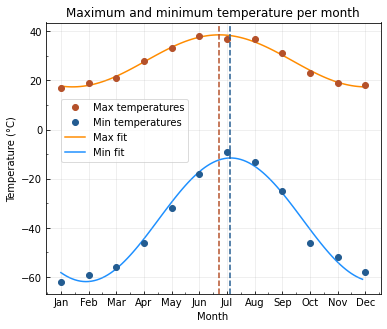

In [3]:
# data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x_data = np.arange(1, 13)
max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

# plot data
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(x_data, max, marker='o', color='#b5512a', label='Max temperatures', linestyle = 'None')
ax.plot(x_data, min, marker='o', color='#235c91', label='Min temperatures', linestyle = 'None')
ax.set_title('Maximum and minimum temperature per month')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (°C)')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', direction='in')
ax.grid(which='major', axis='both', alpha=0.25)
ax.set_axisbelow(True)

def f(x, A, omega, k, const):
    '''Fitting function'''
    return A * np.sin(omega*x + k) + const

x_space=np.arange(1, 12, 0.1)

# fit of maximum temperatures and plot
popt_max, pcov_max = scipy.optimize.curve_fit(f, x_data, max, p0=[15, 0.8, 10, 30])
ax.plot(x_space, f(x_space, *popt_max), color='darkorange', zorder=0, label='Max fit')
print('The fit parameters for the function f(x)=A*sin(omega*x+k)+const over the maximum temperatures are:')
print('A = %1.2f ± %1.2f °C' %(popt_max[0], np.sqrt(np.diag(pcov_max))[0]))
print('omega = %1.2f ± %1.2f 1/month' %(popt_max[1], np.sqrt(np.diag(pcov_max))[1]))
print('k = %1.2f ± %1.2f' %(popt_max[2], np.sqrt(np.diag(pcov_max))[2]))
print('const = %1.2f ± %1.2f °C\n' %(popt_max[3], np.sqrt(np.diag(pcov_max))[3]))

# fit of minimum temperatures and plot
popt_min, pcov_min = scipy.optimize.curve_fit(f, x_data, min, p0=[20, 0.4, 20, -40])
ax.plot(x_space, f(x_space, *popt_min), color='dodgerblue', zorder=0, label='Min fit')
print('The fit parameters for the function f(x)=A*sin(omega*x+k)+const over the minimum temperatures are:')
print('A = %1.2f ± %1.2f °C' %(popt_min[0], np.sqrt(np.diag(pcov_min))[0]))
print('omega = %1.2f ± %1.2f 1/month' %(popt_min[1], np.sqrt(np.diag(pcov_min))[1]))
print('k = %1.2f ± %1.2f' %(popt_min[2], np.sqrt(np.diag(pcov_min))[2]))
print('const = %1.2f ± %1.2f °C\n' %(popt_min[3], np.sqrt(np.diag(pcov_min))[3]))

# plot of the functions
x_max = x_space[np.argmax(f(x_space, *popt_max))]
x_min = x_space[np.argmax(f(x_space, *popt_min))]
ax.axvline(x_max, color='#b5512a', linestyle='--')
ax.axvline(x_min, color='#235c91', linestyle='--')

# goodness of fit
print("To establish whether the fit are reasonable or not, the R^2 and the p-value are computed.")
SSR_max=np.sum((max - f(x_data, *popt_max))**2)
TSS_max=np.sum((np.mean(max)-max)**2)
RSQ_max=1-SSR_max/TSS_max
SSR_min=np.sum((min - f(x_data, *popt_min))**2)
TSS_min=np.sum((np.mean(min)-min)**2)
RSQ_min=1-SSR_min/TSS_min
print('The R2 for max temperatures is R2=%1.2f.' % np.sqrt(RSQ_max))
print('The R2 for min temperatures is R2=%1.2f.' % np.sqrt(RSQ_max))
print('The two interpolation are satisfactory since R2 is almost 1 for both the datasets.')
print("""What's more, note that one could fit the data with two gaussian, but this choice might seem less 
physical, since temperatures over time are probably better described through a periodic function.\n""")

# time offset
print('The time offset of the maximum temperature for the the two datasets is %.2f.' %np.abs(x_max - x_min))
print('This value is less then half a month, so we can assume it is negligible within the fit accuracy.')

# last modifications of the plot
ax.legend(framealpha = 0.7, bbox_to_anchor=(0.44,0.47))
_ = plt.xticks(x_data, months)

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [4]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

# put the data in a dataframe
with open('data/residuals_261.pkl', 'rb') as infile:
    x = pickle.load(infile)
mydict = dict(x.item())
df_raw = pd.DataFrame(mydict)

# clean the dataframe
df = df_raw[abs(df_raw['residuals'])<2.]

# print the dataframe
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


The fit parameters for the function f(x)=A*exp(-0.5*((x-mu)/sigma)**2)+(a*x+b) are:
A = 2048.94 ± 37.19 
mu = -0.09 ± 0.00 
sigma = -0.22 ± 0.00
a = -13.11 ± 8.17 
b = 63.04 ± 11.13 

The chi-square of the fit is: 460.8792092184535
The p-value of the fit is: 3.0095380297608563e-79

It's clear that the fit is not satisfactory given the low p-value. 
Just looking at the histogram one can observe it is not properly described by the fitting function;
in particular, the data in the tails do not follow a gaussian distribution and the linear contribution
added to the interpolation is not enough to cover this discrepancy.


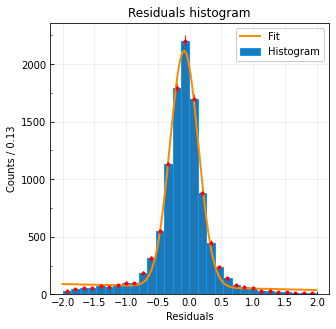

In [5]:
# plot of the histogram
nbins = 30
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

entries, edges, _ = ax.hist(df['residuals'], nbins, edgecolor='#009cff', label='Histogram', color='#1f77b4')
bin_centers = 0.5 * (edges[:-1] + edges[1:])
ax.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='r.', lw=0.9)
binwidth = edges[1]-edges[0]
ax.set_title('Residuals histogram')
ax.set_xlabel('Residuals')
ax.set_ylabel('Counts / %.2f'%binwidth)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', direction='in')
ax.grid(which='major', axis='both', alpha=0.25)
ax.set_axisbelow(True)

# fitting function definition
def f(x, A, mu, sigma, a, b):
    return A * np.exp(-0.5*((x-mu)/sigma)**2) + a*x + b

# fit and print the results
popt, pcov = scipy.optimize.curve_fit(f, bin_centers, entries, p0=[3000, 0, -0.5, 1, 5])
print("The fit parameters for the function f(x)=A*exp(-0.5*((x-mu)/sigma)**2)+(a*x+b) are:")
print('A = %.2f ± %.2f ' %(popt[0], np.sqrt(np.diag(pcov))[0]))
print('mu = %.2f ± %.2f ' %(popt[1], np.sqrt(np.diag(pcov))[1]))
print('sigma = %.2f ± %.2f' %(popt[2], np.sqrt(np.diag(pcov))[2]))
print('a = %.2f ± %.2f ' %(popt[3], np.sqrt(np.diag(pcov))[3]))
print('b = %.2f ± %.2f ' %(popt[4], np.sqrt(np.diag(pcov))[4]))

# plot the fitting function
x_space=np.arange(-2, 2, 0.01)
ax.plot(x_space, f(x_space, *popt), color='darkorange', label='Fit', lw=2)
ax.legend(framealpha = 1)

# chi square of the fit
chi, pvalue = scipy.stats.chisquare(entries, f(bin_centers, *popt))
print("\nThe chi-square of the fit is:", chi)
print("The p-value of the fit is:", pvalue)
print("""\nIt's clear that the fit is not satisfactory given the low p-value. 
Just looking at the histogram one can observe it is not properly described by the fitting function;
in particular, the data in the tails do not follow a gaussian distribution and the linear contribution
added to the interpolation is not enough to cover this discrepancy.""")

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [6]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

# get the data
df_raw = pd.read_csv("data/munich_temperatures_average_with_bad_data.txt", delimiter=' ', names=('Date', 'Temperature'))

# clean the data from non-physical values (i.e. temperature with absolute value > 60)
df = df_raw[abs(df_raw['Temperature'])<80.]
# take the data only in 2008-2012 range
df = df[(df['Date']<2012) & (df['Date']>2008)]

# print the dataframe
df

,Date,Temperature
4748,2008.00274,-2.94444
4749,2008.00548,-2.66667
4750,2008.00821,-2.66667
4751,2008.01095,-2.00000
4752,2008.01369,-1.94444
...,...,...
6204,2011.98836,3.44444
6205,2011.99110,1.27778
6206,2011.99384,2.88889
6207,2011.99658,1.83333


The best-fit values of the parameters are:
a = -9.96 ± 0.13 °C
b = -0.23 ± 0.01
c = 9.26 ± 0.09 °C

The overall average temperature in Munich is: 9.26 °C
The typical daily average values for the coldest and hottest time of year are: 19.22 °C and -0.70 °C

The b parameter is the phase shift in the sine function, enabling us to perform a fit with a
simple sine function (no parameter to rescale the x). Without the b parameter, in fact, at t=0 the 
function would be around c=9.26 °C, while we can clearly see that the temperature for the January month 
is almost 0; the b parameter shifts the sine function and makes us possible to perform the fit. 
In conclusion, b is the time-shift that brings the minimum temperature at January and the maximum around 
June.


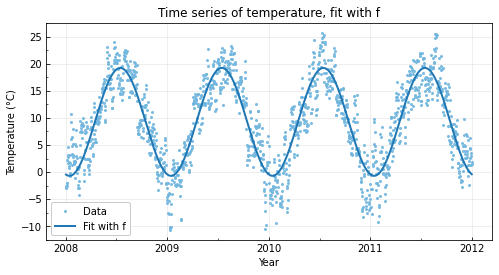

In [7]:
# plot 
fig, ax = plt.subplots(figsize=(8,4))

x = df['Date']
y = df['Temperature']

ax.plot(x, y, marker='.', color='#73b7de', label='Data', linestyle = 'None', alpha=0.9, markersize=4)
ax.set_title('Time series of temperature, fit with f')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', direction='in')
ax.grid(which='major', axis='both', alpha=0.25)
ax.set_axisbelow(True)

# definition of fitting function
def f(x, a, b, c):
    return a * np.cos(2*np.pi*x + b) + c

# fit and print results
popt_f, pcov_f = scipy.optimize.curve_fit(f, x, y, p0=[15, 0, 8])
print('The best-fit values of the parameters are:')
print('a = %.2f ± %.2f °C' %(popt_f[0], np.sqrt(np.diag(pcov_f))[0]))
print('b = %.2f ± %.2f' %(popt_f[1], np.sqrt(np.diag(pcov_f))[1]))
print('c = %.2f ± %.2f °C\n' %(popt_f[2], np.sqrt(np.diag(pcov_f))[2]))

# plot the fitting function
x_space=np.arange(np.min(x), np.max(x), 0.001)
ax.plot(x_space, f(x_space, *popt_f), color='#1f77b4', label='Fit with f', lw=2)
ax.legend(framealpha = 1)

print('The overall average temperature in Munich is: %.2f °C' %np.mean(y))
print('The typical daily average values for the coldest and hottest time of year are: %.2f °C and %.2f °C'
%(np.max(f(x, *popt_f)), np.min(f(x, *popt_f))))
print("""\nThe b parameter is the phase shift in the sine function, enabling us to perform a fit with a
simple sine function (no parameter to rescale the x). Without the b parameter, in fact, at t=0 the 
function would be around c=9.26 °C, while we can clearly see that the temperature for the January month 
is almost 0; the b parameter shifts the sine function and makes us possible to perform the fit. 
In conclusion, b is the time-shift that brings the minimum temperature at January and the maximum around 
June.""")

The best-fit values of the parameters are:
a = -9.96 ± 0.13 °C
b = 1.00 ± 0.00 1/year
c = -3.94 ± 23.79
d = 9.27 ± 0.10 °C


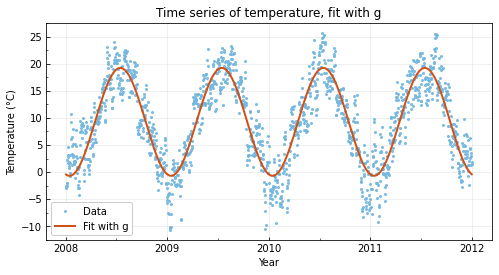

In [8]:
# plot the data
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y, marker='.', color='#73b7de', label='Data', linestyle = 'None', alpha=0.9, markersize=4)
ax.set_title('Time series of temperature, fit with g')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', direction='in')
ax.grid(which='major', axis='both', alpha=0.25)
ax.set_axisbelow(True)

# definition of another fitting function
def g(x, a, b, c, d):
    return a * np.cos(2*np.pi*x*b + c) + d

# fit and plot
popt_g, pcov_g = scipy.optimize.curve_fit(g, x, y, p0=[9, 1, -0.2, 9])
print('The best-fit values of the parameters are:')
print('a = %.2f ± %.2f °C' %(popt_g[0], np.sqrt(np.diag(pcov_g))[0]))
print('b = %.2f ± %.2f 1/year' %(popt_g[1], np.sqrt(np.diag(pcov_g))[1]))
print('c = %.2f ± %.2f' %(popt_g[2], np.sqrt(np.diag(pcov_g))[2]))
print('d = %.2f ± %.2f °C' %(popt_g[3], np.sqrt(np.diag(pcov_g))[3]))
ax.plot(x_space, g(x_space, *popt_g), color='#d15017', label='Fit with g', lw=2)
_ = ax.legend(framealpha = 1)

In [9]:
# calculation of RRS for f and g
RSS_f = np.sum(pow(y-f(x, *popt_f), 2))
RSS_g = np.sum(pow(y-g(x, *popt_g), 2))
ndof_f = 3 - 1
ndof_g = 4-1

print("The RSS for f and g are, respectively: %.2f, %.2f" %(RSS_f, RSS_g))

# definition of F test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - scipy.stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

# calculation of F test
CL = Ftest(RSS_f, RSS_g, ndof_f, ndof_g, np.size(x), verbose=True)

The RSS for f and g are, respectively: 18669.52, 18669.23
CL: 0.880 , additional parameter necessary: NO
